Do the MMD components *combined* correlate to the DRA `minority` rating (and vice versa)?

In [1]:
import os
import pandas as pd

from rdametrics import *

Load the all-up scores dataframe from disk

In [2]:
scores_path: str = "~/local/beta-ensembles/dataframe/contents/scores_df.parquet"
scores_df = pd.read_parquet(os.path.expanduser(scores_path))
scores_df.head()

,map,estimated_vote_pct,pr_deviation,estimated_seats,fptp_seats,disproportionality,efficiency_gap_wasted_votes,efficiency_gap_statewide,efficiency_gap,seats_bias,...,proportional_coalitions,minority,county_splitting,district_splitting,counties_split,county_splits,splitting,state,chamber,ensemble
0,2500,0.4837,0.0762,11.8678,11,0.0598,0.1075,0.0744,0.0435,0.0299,...,13,68,1.5858,1.5834,35,64,2,FL,congress,A0
1,5000,0.4837,0.0827,11.6842,11,0.0664,0.0973,0.0744,0.0500,0.0415,...,13,75,1.6487,1.6488,38,71,0,FL,congress,A0
2,7500,0.4837,0.0646,12.1917,12,0.0482,0.0673,0.0387,0.0319,0.0232,...,13,70,1.6020,1.6233,39,70,0,FL,congress,A0
3,10000,0.4837,0.0647,12.1873,12,0.0484,0.0745,0.0387,0.0320,0.0271,...,13,71,1.6085,1.5958,33,67,0,FL,congress,A0
4,12500,0.4837,0.0408,12.8575,13,0.0245,0.0399,0.0030,0.0081,0.0042,...,13,74,1.5676,1.5361,34,60,8,FL,congress,A0


Define a combined MMD score.

In [3]:
df = pd.DataFrame({
    'state': scores_df['state'],
    'chamber': scores_df['chamber'],
    'ensemble': scores_df['ensemble'],
    'minority': scores_df['minority'],
    'mmd_combined': scores_df['mmd_black'] + scores_df['mmd_hispanic'] + scores_df['mmd_coalition']
})

Look at the correlation of that and the `minority` rating.

In [4]:
focus_metrics: List[str] = ["mmd_combined", "minority"]
D = make_correlation_tables(states, chambers, df, focus_metrics)
avg_corr = average_correlation_tables(D, focus_metrics, combos)
avg_corr

,mmd_combined,minority
mmd_combined,1.00,0.11
minority,0.11,1.00


Plot the raw points

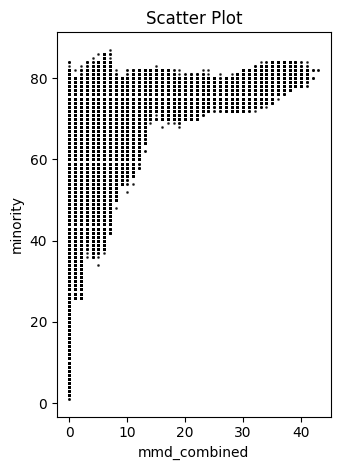

In [6]:
plot_xy(df, "mmd_combined", "minority")

Even combined, MMD does not correlate with the DRA `minority` rating.
The bar is simply too high, i.e., the `minority` rating is more sensitive, registers more minority opportunity than the 50%+1 of majority-minority districts.